In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
# Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los datos
x_train = x_train / 255.0
x_test = x_test / 255.0

# Aplanar las imágenes de 28x28 a un vector de 784
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convertir las etiquetas a formato one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Dividir el conjunto de entrenamiento en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(f"Datos de entrenamiento: {x_train.shape}, Etiquetas: {y_train.shape}")
print(f"Datos de validaci\u00f3n:    {x_val.shape}, Etiquetas: {y_val.shape}")
print(f"Datos de prueba:        {x_test.shape}, Etiquetas: {y_test.shape}")


Datos de entrenamiento: (48000, 28, 28, 1), Etiquetas: (48000, 10)
Datos de validación:    (12000, 28, 28, 1), Etiquetas: (12000, 10)
Datos de prueba:        (10000, 28, 28, 1), Etiquetas: (10000, 10)


In [ ]:
# 🔄 Celda 3: Aumento de datos
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)


In [ ]:
# 🧠 Celda 4: Crear el modelo mejorado
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def create_model(input_shape=(28, 28, 1), num_classes=10):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.6))  # Más dropout

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

model = create_model()
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,370 (435.04 KB)

 Trainable params: 110,922 (433.29 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# ⏳ Celda 5: Entrenar el modelo con EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 98s 63ms/step - accuracy: 0.7592 - loss: 0.7804 - val_accuracy: 0.9667 - val_loss: 0.1149
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 93s 62ms/step - accuracy: 0.9367 - loss: 0.2172 - val_accuracy: 0.9714 - val_loss: 0.0906
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 91s 60ms/step - accuracy: 0.9508 - loss: 0.1709 - val_accuracy: 0.9743 - val_loss: 0.0871
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 147s 64ms/step - accuracy: 0.9563 - loss: 0.1566 - val_accuracy: 0.9756 - val_loss: 0.0789
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 90s 60ms/step - accuracy: 0.9615 - loss: 0.1346 - val_accuracy: 0.9787 - val_loss: 0.0654
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 92s 61ms/step - accuracy: 0.9644 - loss: 0.1261 - val_accuracy: 0.9824 - val_loss: 0.0574
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 143s 62ms/step - accuracy: 0.9651 - loss: 0.1219 - val_accuracy: 0.9769 - val_loss: 0.0767
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 141s 61ms/step - accuracy: 0.9675 - loss: 0

In [ ]:
# Guardar el modelo en formato HDF5
model.save("modelo_mnist_mejorado.h5")
print("Modelo guardado como 'modelo_mnist_mejorado.h5'")


Modelo guardado como 'modelo_mnist_mejorado.h5'


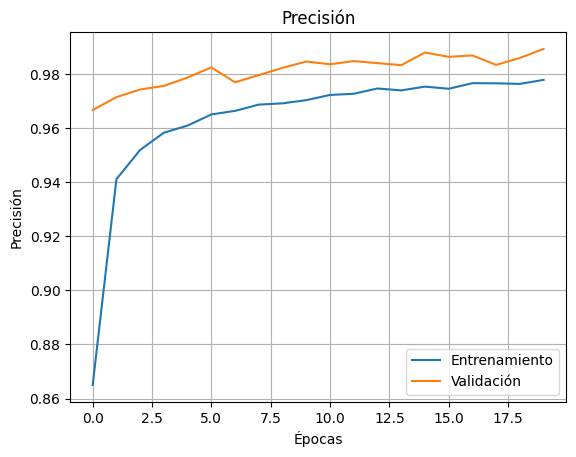

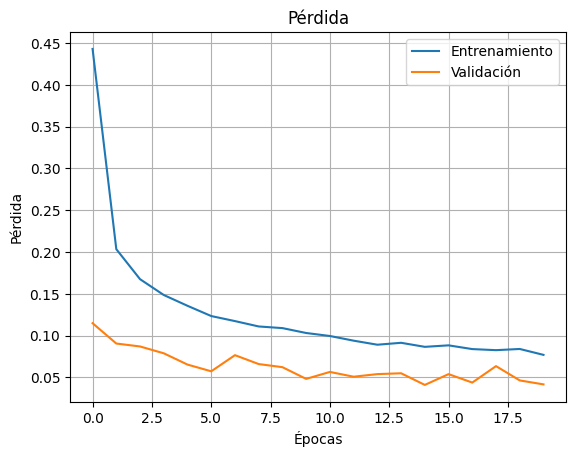

In [ ]:
# Precisión
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

# Pérdida
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Precisión en test: {test_accuracy:.4f} | Pérdida: {test_loss:.4f}")

# Generar predicciones
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)


Precisión en test: 0.9888 | Pérdida: 0.0362
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


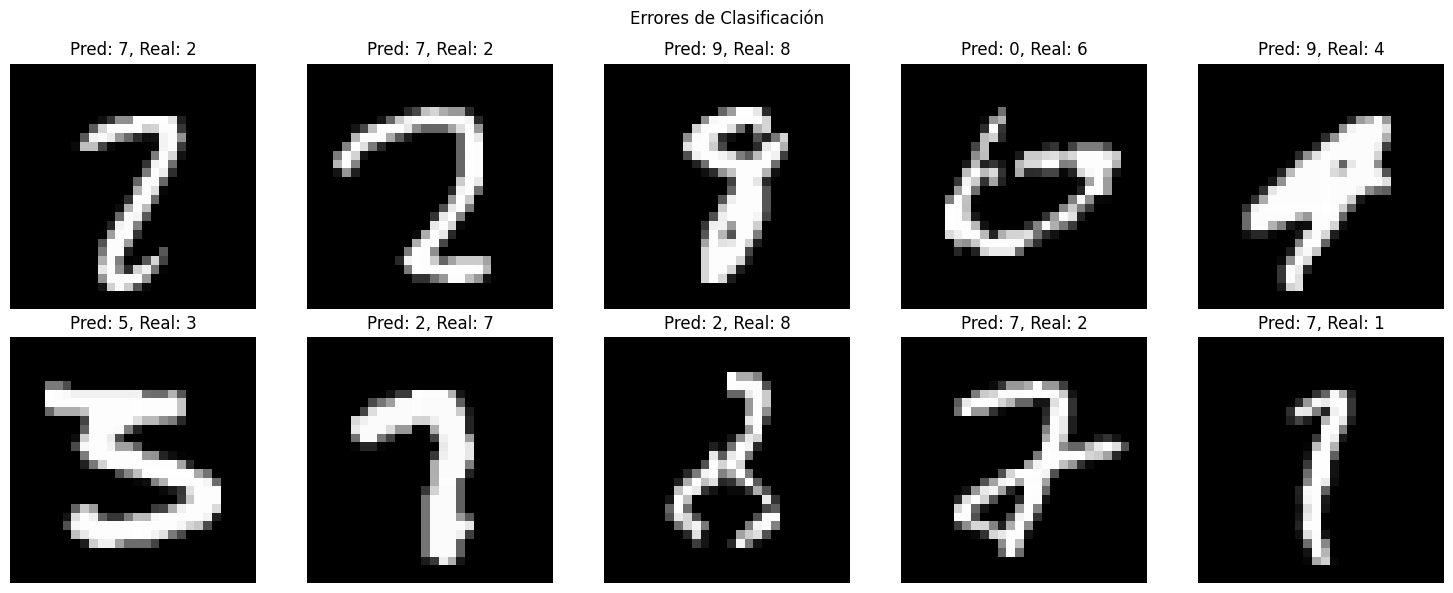

In [ ]:
# Índices donde las predicciones fueron incorrectas
errores = np.where(y_pred != y_true)[0]

# Mostrar ejemplos mal clasificados
plt.figure(figsize=(15, 6))
for i, idx in enumerate(errores[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[idx]}, Real: {y_true[idx]}")
    plt.axis('off')

plt.suptitle("Errores de Clasificación")
plt.tight_layout()
plt.show()


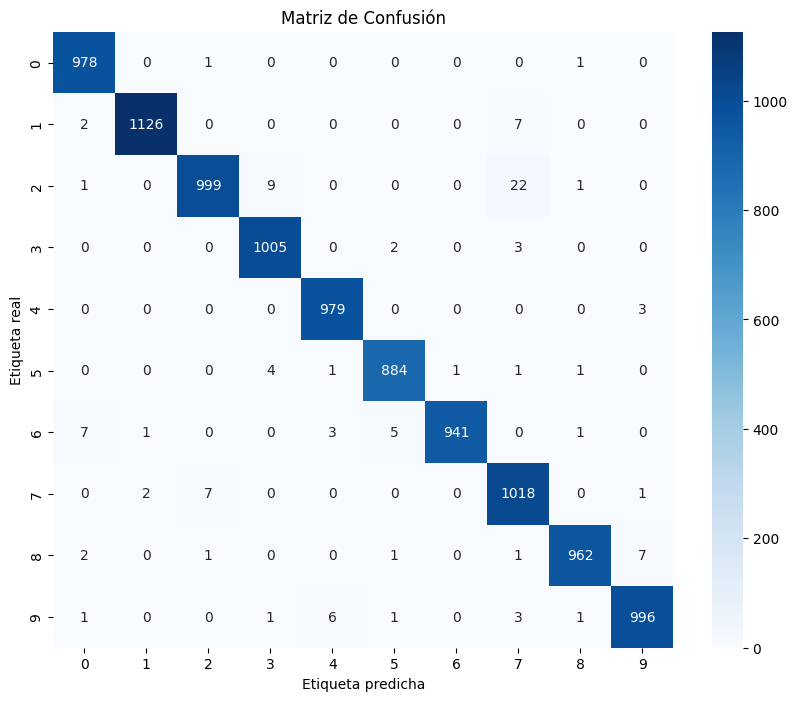

📋 Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.96      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

📌 RESUMEN DEL MODELO
Total de muestras: 10000
Correctas: 9888 (98.88%)
Incorrectas: 112 (1.12%)
Precisión final (test): 0.9888
🔍 Clases más confundidas:
Real: 2 → Predicho: 7  (22 veces)
Real: 2 → Predicho: 3  (9

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta real")
plt.show()
from sklearn.metrics import classification_report

print("📋 Reporte de Clasificación:\n")
print(classification_report(y_true, y_pred))
import pandas as pd

# Crear DataFrame de errores
errores_df = pd.DataFrame({
    "Índice": errores,
    "Etiqueta_real": y_true[errores],
    "Predicción": y_pred[errores]
})

# Mostrar los primeros errores
errores_df.head(10)
total = len(y_true)
correctas = np.sum(y_pred == y_true)
incorrectas = total - correctas

print("📌 RESUMEN DEL MODELO")
print(f"Total de muestras: {total}")
print(f"Correctas: {correctas} ({correctas / total:.2%})")
print(f"Incorrectas: {incorrectas} ({incorrectas / total:.2%})")
print(f"Precisión final (test): {test_accuracy:.4f}")
confused_pairs = []

for i in range(10):
    for j in range(10):
        if i != j and cm[i, j] > 0:
            confused_pairs.append((i, j, cm[i, j]))

# Ordenar por errores
confused_pairs.sort(key=lambda x: x[2], reverse=True)

# Mostrar top 5 confusiones
print("🔍 Clases más confundidas:")
for i, j, val in confused_pairs[:5]:
    print(f"Real: {i} → Predicho: {j}  ({val} veces)")


In [ ]:
def create_model_v2(input_shape=(28, 28, 1), num_classes=10):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.6))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

model_v2 = create_model_v2()
history_v2 = model_v2.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)

test_loss_v2, test_acc_v2 = model_v2.evaluate(x_test, y_test, verbose=0)
print(f"Precisión con Adam(0.0005): {test_acc_v2:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.7047 - loss: 0.9367 - val_accuracy: 0.9616 - val_loss: 0.1165
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 94s 63ms/step - accuracy: 0.9312 - loss: 0.2349 - val_accuracy: 0.9724 - val_loss: 0.0887
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 94s 63ms/step - accuracy: 0.9492 - loss: 0.1735 - val_accuracy: 0.9748 - val_loss: 0.0853
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 94s 63ms/step - accuracy: 0.9559 - loss: 0.1505 - val_accuracy: 0.9689 - val_loss: 0.0958
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 94s 63ms/step - accuracy: 0.9608 - loss: 0.1322 - val_accuracy: 0.9815 - val_loss: 0.0550
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 90s 60ms/step - accuracy: 0.9632 - loss: 0.1259 - val_accuracy: 0.9698 - val_loss: 0.0968
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 89s 60ms/step - accuracy: 0.9670 - loss: 0.1165 - val_accuracy: 0.9801 - val_loss: 0.0624
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 89s 59ms/step - accuracy: 0.9679 - loss: 0.10

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def create_model_v3(input_shape=(28, 28, 1), num_classes=10):
    model = Sequential()

    model.add(Input(shape=input_shape))  # 👈 Buenas prácticas recomendadas por Keras

    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())

    model.add(Conv2D(256, (3, 3), activation='relu'))  # Capa extra
    model.add(BatchNormalization())
    # No agregamos más MaxPooling para evitar problemas con dimensiones

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.6))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [ ]:
model_v3 = create_model_v3()

history_v3 = model_v3.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.7742 - loss: 0.7431 - val_accuracy: 0.9812 - val_loss: 0.0628
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 119s 79ms/step - accuracy: 0.9550 - loss: 0.1526 - val_accuracy: 0.9876 - val_loss: 0.0412
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 140s 79ms/step - accuracy: 0.9689 - loss: 0.1146 - val_accuracy: 0.9899 - val_loss: 0.0350
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 148s 82ms/step - accuracy: 0.9711 - loss: 0.1032 - val_accuracy: 0.9896 - val_loss: 0.0352
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 117s 78ms/step - accuracy: 0.9773 - loss: 0.0834 - val_accuracy: 0.9858 - val_loss: 0.0499
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 119s 79ms/step - accuracy: 0.9784 - loss: 0.0774 - val_accuracy: 0.9910 - val_loss: 0.0306
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 118s 78ms/step - accuracy: 0.9802 - loss: 0.0739 - val_accuracy: 0.9918 - val_loss: 0.0294
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 118s 78ms/step - accuracy: 

In [ ]:
# Evaluar modelo_v3
test_loss_v3, test_acc_v3 = model_v3.evaluate(x_test, y_test, verbose=0)


In [ ]:
acc_original = test_accuracy  # Precisión original
acc_v2 = test_acc_v2  # Precisión con Adam(0.0005)
acc_v3 = test_acc_v3  # Precisión con capa extra

print("\n📊 Comparación de precisión en Test:")
print(f"🔹 Modelo Original: {acc_original:.4f}")
print(f"🔹 Modelo V2 (Adam 0.0005): {acc_v2:.4f}")
print(f"🔹 Modelo V3 (Capa extra): {acc_v3:.4f}")



📊 Comparación de precisión en Test:
🔹 Modelo Original: 0.9888
🔹 Modelo V2 (Adam 0.0005): 0.9879
🔹 Modelo V3 (Capa extra): 0.9918


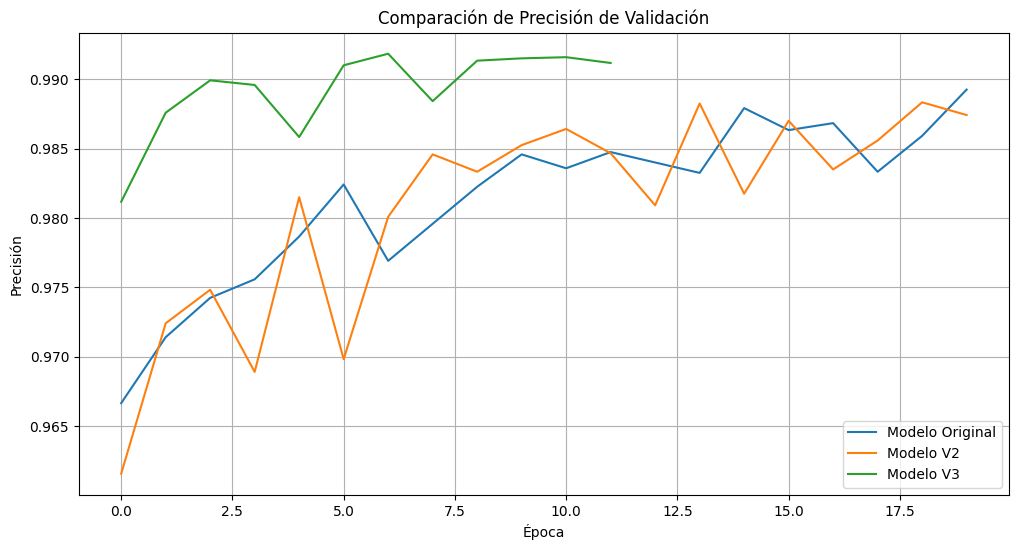

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['val_accuracy'], label='Modelo Original')
plt.plot(history_v2.history['val_accuracy'], label='Modelo V2')
plt.plot(history_v3.history['val_accuracy'], label='Modelo V3')
plt.title("Comparación de Precisión de Validación")
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.legend()
plt.grid(True)
plt.show()


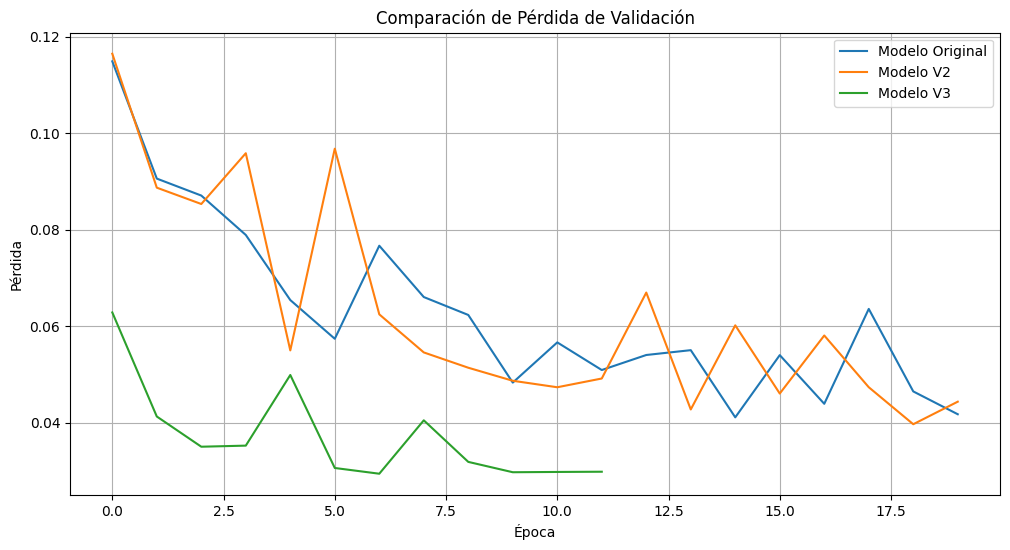

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['val_loss'], label='Modelo Original')
plt.plot(history_v2.history['val_loss'], label='Modelo V2')
plt.plot(history_v3.history['val_loss'], label='Modelo V3')
plt.title("Comparación de Pérdida de Validación")
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.legend()
plt.grid(True)
plt.show()


🔍 Precisión del modelo V3 en test: 0.9918 | Pérdida: 0.0293
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


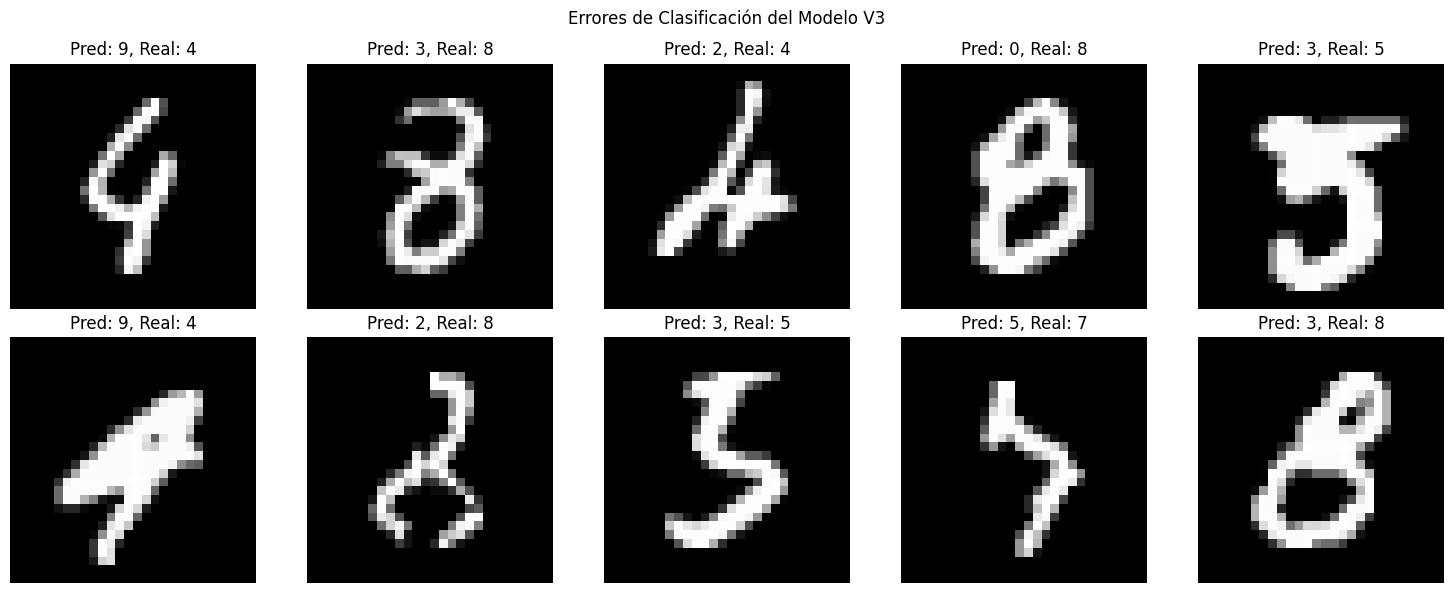

In [ ]:
test_loss_v3, test_acc_v3 = model_v3.evaluate(x_test, y_test, verbose=0)
print(f"🔍 Precisión del modelo V3 en test: {test_acc_v3:.4f} | Pérdida: {test_loss_v3:.4f}")
# Predicciones del modelo V3
y_pred_v3_probs = model_v3.predict(x_test)
y_pred_v3 = np.argmax(y_pred_v3_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Índices de errores
errores_v3 = np.where(y_pred_v3 != y_true)[0]

# Mostrar 10 errores
plt.figure(figsize=(15, 6))
for i, idx in enumerate(errores_v3[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred_v3[idx]}, Real: {y_true[idx]}")
    plt.axis('off')
plt.suptitle("Errores de Clasificación del Modelo V3")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


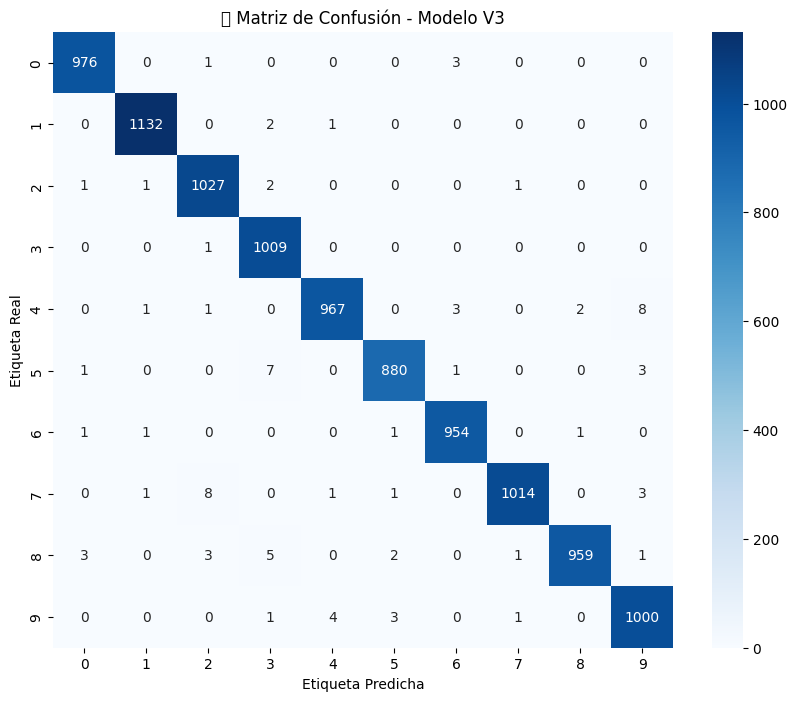

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_v3 = confusion_matrix(y_true, y_pred_v3)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_v3, annot=True, fmt='d', cmap='Blues')
plt.title("🔍 Matriz de Confusión - Modelo V3")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()



In [ ]:
from sklearn.metrics import classification_report

print("📋 Reporte de Clasificación para Modelo V3:\n")
print(classification_report(y_true, y_pred_v3))


📋 Reporte de Clasificación para Modelo V3:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      1.00      0.99       958
           7       1.00      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
confused_v3 = []
for i in range(10):
    for j in range(10):
        if i != j and cm_v3[i, j] > 0:
            confused_v3.append((i, j, cm_v3[i, j]))

confused_v3.sort(key=lambda x: x[2], reverse=True)

print("🔎 Clases más confundidas por el Modelo V3:")
for i, j, val in confused_v3[:5]:
    print(f"Real: {i} → Predicho: {j}  ({val} veces)")


🔎 Clases más confundidas por el Modelo V3:
Real: 4 → Predicho: 9  (8 veces)
Real: 7 → Predicho: 2  (8 veces)
Real: 5 → Predicho: 3  (7 veces)
Real: 8 → Predicho: 3  (5 veces)
Real: 9 → Predicho: 4  (4 veces)
